## Método del Intervalo Medio

#### Importamos librerías

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

#### Función intervalo medio

Definimos la función

In [12]:
def f(x):
    return 24*x**3-4*x**2-5*x+4

Función del Intervalo Medio

In [13]:
start_time = time.time()
def calcular_intervalo_medio(a, b, E):
    if f(a) * f(b) >= 0:
        print("El método del intervalo medio no puede aplicarse a este intervalo.")
        return None

    n = math.ceil((math.log(b - a) - math.log(E)) / math.log(2))  # cantidad de iteraciones necesarias
    print(f"Cantidad de iteraciones estimadas: {n}\n")

    iteraciones = 0
    puntos_medios = []
    valores_iteraciones = []

    while abs(b - a) > E:
        c = (a + b) / 2
        puntos_medios.append(c)
        #print(f"Iteración {iteracion}: Intervalo [{a}, {b}], Punto medio = {c}")
        error = abs(b - a)
        valores_iteraciones.append([iteraciones + 1, c, f(c), (a, b), error])

        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        #print(f"Error cometido: {abs(b - a) / 2}\n")
        iteraciones += 1
    c = (a + b) / 2
    puntos_medios.append(c)
    error = abs(b - a)
    valores_iteraciones.append([iteraciones + 1, c, f(c), (a, b), error])
    iteraciones += 1
    
    #print(f"Raíz aproximada: {(a + b) / 2}")
    #print(f"Error final: {(b - a) / 2}")
    return valores_iteraciones, puntos_medios
end_time = time.time()

#### Gráfico

In [14]:
def graficar_intervalo_medio(puntos_medios, a, b):
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(a, b, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label="f(x)", color='blue')
    plt.axhline(0, color='black', linewidth=0.5)

    for i, c in enumerate(puntos_medios):
        plt.plot(c, f(c), 'ro')
        plt.text(c, f(c), f'Iter {i+1}', fontsize=12, verticalalignment='bottom')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Método del Intervalo Medio')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Tabla

In [15]:
def tabla_intervalo_medio(valores_iteraciones):
    df = pd.DataFrame(valores_iteraciones, columns=['Iteración', 'x', 'f(x)', 'Intervalo (a, b)', 'Error'])

    # Guardar el DataFrame en un archivo CSV
    df.to_csv('../data/tabla_intervalo_medio.csv', index=False)
    return df

#### Ejecución

Gráfico

Cantidad de iteraciones estimadas: 8



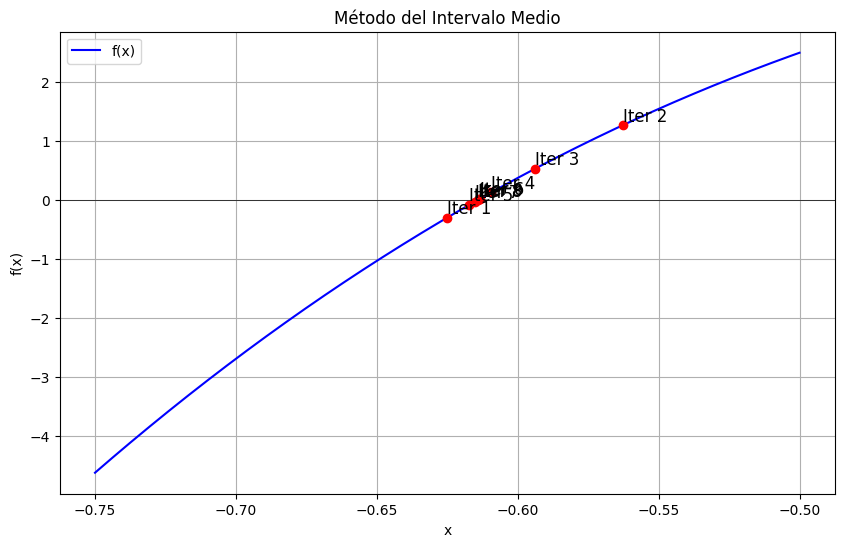

El tiempo de ejecución fue: 0.000455 segundos


In [16]:
a = -0.75
b = -0.5
E = 0.001

valores_iteraciones, puntos_medios = calcular_intervalo_medio(a, b, E)

df = tabla_intervalo_medio(valores_iteraciones)
graficar_intervalo_medio(puntos_medios, a, b)
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time:.6f} segundos")

Tabla

In [8]:
calcular_intervalo_medio(a, b, E)
df_intervalo_medio = pd.read_csv('../data/tabla_intervalo_medio.csv')
df_intervalo_medio

Cantidad de iteraciones estimadas: 8



,Iteración,x,f(x),"Intervalo (a, b)",Error
0,1,-0.625000,-0.296875,"(-0.75, -0.5)",0.250000
1,2,-0.562500,1.275391,"(-0.625, -0.5)",0.125000
2,3,-0.593750,0.534912,"(-0.625, -0.5625)",0.062500
3,4,-0.609375,0.130707,"(-0.625, -0.59375)",0.031250
4,5,-0.617188,-0.080128,"(-0.625, -0.609375)",0.015625
5,6,-0.613281,0.026024,"(-0.6171875, -0.609375)",0.007812
6,7,-0.615234,-0.026867,"(-0.6171875, -0.61328125)",0.003906
7,8,-0.614258,-0.000376,"(-0.615234375, -0.61328125)",0.001953
8,9,-0.613770,0.012836,"(-0.6142578125, -0.61328125)",0.000977
